# 5. Resampling Methods – Conceptual

Excercises from **Chapter 5* of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Using basic statistical properties of the variance, as well as single- variable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX + (1 − α)Y ).

![5_1.jpg](./images/5_1.jpg)


## 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

- (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.
- (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?
- (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)n.
- (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?
- (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?
- (f) When n = 10, 000, what is the probability that the jth observa- tion is in the bootstrap sample?

![5_2.jpg](./images/5_1.jpg)

### 2(g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

Text(0,0.5,'prob')

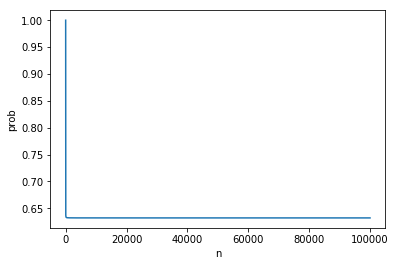

In [48]:
def prob_j_in_sample(n):
    return 1 - (1 - 1/n)**n

x = np.arange(1, 100000)
y = np.array([prob_j_in_sample(n) for n in x])

ax = sns.lineplot(x=x, y=prob_j_in_sample(x))
plt.xlabel('n')
plt.ylabel('probability')

### 2(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [94]:
store = [] 
for i in np.arange(1, 10000):
    store += [np.sum((np.random.randint(low=1, high=101, size=100) == 4)) > 0]

np.mean(store)

0.633063306330633

**Comment**

The result observed form a numerical approach above is simimilar to to our probabilistic stimation for a sample size of 100 which was P = 0.634.

It is interesting to note that there is a suprisingly high level of variability between results given that results are averaged over 10000 tests. This can be observed by running the above cell multiple time (note that no random seed is set).

## 3. We now review k-fold cross-validation.

### (a) Explain how k-fold cross-validation is implemented.

In k-fold cross validation k independant samples are taken from the set of all available observations each of size, $1 - (\frac{n}{k})$

The model is then fitted to each of these training samples, and then tested on the observations that were excluded from that sample. This produces k error scores which are then averaged to produce the final cross-validation score.

Note that the proportion of observations that are included in each training increases increases with k.

### (b) What are the advantages and disadvantages of k-fold cross- validation relative to:

### - i. The validation set approach?

When $k>2$, cross-validation provides a larger training set than the validation set approach. This means that there is less bias in the training setting. This means crossvalidation can produce more accurate accuracy estimates for more flexible models that benefit from a larger number of observations in the training set.

Cross-validation results will exhibit more variability than the validation set approach. The approach is also more computaitonally expensive because the model must be fitted and tested for each fold in k.

### - ii. LOOCV?

Cross-validation for k<n provides less variance in accuracy scores than LOOCV. It is also less computationally expensive in most settings (assuming that a linear regression model isn't used and a certain mathematical shortcut implemented for LOOCV).

LOOCV provides the maximum proportion of the original observations for training, which could provide an improved accuracy estimate if the model is limeted by the size of training set available in k-fold cross validation (for some small value of k). LOOCV can also be more computationally efficient for linear regression assuming that the afformentioned mathematical shortcut is implemented.


## 4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.


Given n observations of X sampled from the population, we use our model to make the corresponding predictions for the response Y. We can then estimate the standard deviation of the the responses using the formula:

$\hat{σ} = \sqrt{\frac{1}{n - 1}\sum_{i=1}^{n}{(\hat{y_i} - \bar{y})^2}}$

The accuracy of this estimate is limited by its variability. 

We can use the bootstrap method to improve the accuarcy of this estimate. We randomly select n observations from the original dataset to produce a boostrap dataset $X^{*1}$, the sampling is done with replacement. We can use $X^{*1}$ to produce a new bootstrap estimate $\hat{σ}^{*1}$. We repeat this procedure $B$ times for some large value of $B$ to produce $B$ different bootstrap datasets, $X^{*1}$, $X^{*2}$,..., $X^{*B}$, and $B$ resultant $σ$ estimates, $\hat{σ}^{*1}$, $\hat{σ}^{*2}$,...,$\hat{σ}^{*B}$. The estimate $\hat{σ}$ is then:

$\hat{σ} = E[\hat{σ}^{*B}]$

For large values $B$ should provide an improved estimate $\hat{σ}$